<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/BinaryTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### I. Leet Code review part 1: Binary Tree:
"""Given a binary tree, return the preorder traversal of its nodes' values.
Example:
Input: [1,null,2,3]
   1
    \
     2
    /
   3

Output: [1,2,3]"""

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def preorderTraversal(self, root: TreeNode) -> List[int]:
        pre = []
        def RootLeftRight(node: TreeNode, pre: List[int]):
            if not node:
                return 
            pre.append(node.val)
            RootLeftRight(node.left, pre)
            RootLeftRight(node.right, pre)
        
        RootLeftRight(root, pre)
        return pre

In [ ]:
# 12ms solution 
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def preorderTraversal(self, root: TreeNode) -> List[int]:
        # validate input
        if not root:
            return []
        
        # traverse
        preorder = []
        self.traverse(root, preorder)
        return preorder
    
    def traverse(self, root: TreeNode, preorder: List[int]) -> List[int]:
        if not root:
            return
        
        preorder.append(root.val)
        if root.left:
            self.traverse(root.left, preorder)
        if root.right:
            self.traverse(root.right, preorder)
        
#         # divide and concur
#         left_list = []
#         right_list = []
#         if root.left:
#             left_list = self.preorderTraversal(root.left)
#         if root.right:
#             right_list = self.preorderTraversal(root.right)
        
#         return [root.val] + left_list + right_list

In [ ]:
# Pre-order using iterate loop. 
""" 16 ms, using stack (recursive in 1st commnet part)"""
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def preorderTraversal(self, root: TreeNode) -> List[int]:
        # if root == None:
        #     return []
        # return [root.val] + self.preorderTraversal(root.left) + self.preorderTraversal(root.right)
        
        if root == None:
            return []
        
        final_list = [root.val]    
        stack = [root.right, root.left]
        
        while len(stack) > 0:
            next_node = stack.pop()
            if next_node == None:
                continue
            
            final_list.append(next_node.val)
            stack = stack + [next_node.right, next_node.left]

        return final_list

In [ ]:
# Applying Recursion can be surprisingly simple 
#  Ex return in-order 
class Solution:
    def inorderTraversal(self, root: TreeNode) -> List[int]:
        res = []
        if root:
            res = self.inorderTraversal(root.left)
            res.append(root.val)
            res = res + self.inorderTraversal(root.right)
        return res
      
# SHORTLY it can be presented as below        
# 1 To return Pre-order 
class Solution:
    def preorderTraversal(self, root: TreeNode) -> List[int]:
        if root == None:
            return []
        return [root.val] + self.preorderTraversal(root.left) + self.preorderTraversal(root.right)

# 2 To return In-order 
class Solution:
    def inorderTraversal(self, root: TreeNode) -> List[int]:
        if root == None:
            return []
        return self.inorderTraversal(root.left) + [root.val] + self.inorderTraversal(root.right)

# 3-1 To return post-order 
class Solution:
    def postorderTraversal(self, root: TreeNode) -> List[int]:
        if not root:
            return []
        
        return self.postorderTraversal(root.left) + self.postorderTraversal(root.right) + [root.val]

# 3- 2 To return post-order
class Solution:
    def postorderTraversal(self, root: TreeNode) -> List[int]:
        res = []
        if root:
            res = self.postorderTraversal(root.left)
            res = res + self.postorderTraversal(root.right)
            res.append(root.val)
        return res

In [ ]:
#2 How to iterate with loop for In-Order traversal
# Algorithm
""" From root, go as far left as possible, pushing all nodes onto stack. While nodes on stack, pop a node and add it to result
Its left child (if any) has already been visited, because it was added to stack later so pop earlier. 
If node has a right child, add that right and all its left branch to the stack. 
"""
class Solution:
    def inorderTraversal(self, root: TreeNode) -> List[int]:
        # iteratively       
        if not root:
            return []

        final_list, stack = [], []
        # put all of left childs of root to stack
        while root:
            stack.append(root)
            root = root.left

        # pop the left one out and add the right and all of it left childs in
        while stack:
            cur_node = stack.pop()
            final_list.append(cur_node.val)
            if cur_node.right:
                node = cur_node.right
                while node:
                    stack.append(node)
                    node = node.left

        return final_list 

In [ ]:
#3 How to iterate with loop for post-Order traversal
""" 3-1: Alogorithm:
Maintain a stack of nodes discovered and to be visited. Nodes are added to front of results
(or the end of a list which is reversed before returning result).
Add left children to stack before right so right subtrees are visited before left 

Alternatively, recursive left, recursive right, then visit node
Time - O(n)
Space - O(n)
"""
# Code here
class Solution:
    def postorderTraversal(self, root: TreeNode) -> List[int]:
        if not root:
            return []
        result = deque() # use deque so that we can appendleft
        stack = [root]

        while stack:
          cur_node = stack.pop()
          result.appendleft(cur_node.val)
          if cur_node.left:
            stack.append(cur_node.left)
          if cur_node.right:
            stack.append(cur_node.right)
          
        return list(result)
            

""" 3-2: Using 2 stacks
Geeks Algo: https://www.geeksforgeeks.org/iterative-postorder-traversal/?ref=rp
1. Push root to first stack.
2. Loop while first stack is not empty
   2.1 Pop a node from first stack and push it to second stack
   2.2 Push left and right children of the popped node to first stack
3. Print contents of second stack
"""
# Code here       
class Solution:
    def postorderTraversal(self, root: TreeNode) -> List[int]:
        if not root:
            return []
        stack = []
        second_stack = []
        stack.append(root)

        while stack:
            cur_node = stack.pop()
            second_stack.append(cur_node.val)
            if cur_node.left:
                stack.append(cur_node.left)
            if cur_node.right:
                stack.append(cur_node.right)
        
        # reverse the output or pop() while second_stack is not empty
        second_stack = second_stack[::-1]
        return second_stack
""" 3-3 Recursive 2
"""
class Solution:
    def postorderTraversal(self, root: TreeNode) -> List[int]:
        result = []
        self.postorder(root, result)
        return result 
    def postorder(self, node: TreeNode, arr :List[int]):
        if not node:
          return
        self.postorder(node.left, arr)
        self.postorder(node.right, arr)
        arr.append(node.val)


In [ ]:
"""Given a binary tree, return the level order traversal of its nodes' values. (ie, from left to right, level by level).

For example:
Given binary tree [3,9,20,null,null,15,7],
    3
   / \
  9  20
    /  \
   15   7
return its level order traversal as:
[
  [3],
  [9,20],
  [15,7]
]"""
# My solution 
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def levelOrder(self, root: TreeNode) -> List[List[int]]:
        dic = {}
        layer = 0
        def bfs(node: TreeNode, layer:int):
            if not node:
                return
            if layer in dic:
                dic[layer] += [node.val]
            else:
                dic[layer] = [node.val]
            
            if node.left:
                bfs(node.left,layer+1)
            if node.right:
                bfs(node.right,layer+1)
                
        bfs(root,layer)
        return list(dic.values())
         
### for more reference, list.extend():  https://www.geeksforgeeks.org/append-extend-python/

'''level is a list of the nodes in the current level. Keep appending a list of the values of these nodes to ans 
and then updating level with all the nodes in the next level (kids) until it reaches an empty level. 
Python's list comprehension makes it easier to deal with many conditions in a concise manner.'''

'''
Solution 1, (6 lines)
'''
def levelOrder(self, root):
    ans, level = [], [root]
    while root and level:
        ans.append([node.val for node in level])
        LRpair = [(node.left, node.right) for node in level]
        level = [leaf for LR in LRpair for leaf in LR if leaf]
    return ans

'''Solution 2, 
(5 lines), same idea but use only one list comprehension in while loop to get the next level
'''
def levelOrder(self, root):
    ans, level = [], [root]
    while root and level:
        ans.append([node.val for node in level])            
        level = [kid for n in level for kid in (n.left, n.right) if kid]
    return ans

'''Solution 3 (10 lines), 
just an expansion of solution 1&2 for better understanding.
'''
def levelOrder(self, root):
    if not root:
        return []
    ans, level = [], [root]
    while level:
        ans.append([node.val for node in level])
        temp = []
        for node in level:
            temp.extend([node.left, node.right])
        level = [leaf for leaf in temp if leaf]
    return ans

In [ ]:
''' ### May 20th Kth Smallest Element in a BST
Solution
Given a binary search tree, write a function kthSmallest to find the kth smallest element in it.

Note: u may assume k is always valid, ** 1 ≤ k ≤ BST's  total ** elements.

Input: root = [3,1,4,null,2], k = 1
   3
  / \
 1   4
  \
   2
Output: 1


Input: root = [5,3,6,2,4,null,null,1], k = 3
       5
      / \
     3   6
    / \
   2   4
  /
 1
Output: 3'''

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def kthSmallest(self, root: TreeNode, k: int) -> int:
        def travesal(node: TreeNode) -> List[int]:
            if not node:
                return []
            return travesal(node.left) + [node.val] + travesal(node.right)
        
        arr = sorted(travesal(root))        
        return arr[k-1]
  

In [ ]:
#### INTERVIEW NOTES #######
https://leetcode.com/discuss/interview-experience/638214/amazon-sde2-google-l4-facebook-e4-offer-offer-offer-april-2020

https://github.com/donnemartin/system-design-primer#study-guide
https://leetcode.com/discuss/general-discussion/458695/dynamic-programming-patterns/544912
https://leetcode.com/problems/permutations/discuss/18239/A-general-approach-to-backtracking-questions-in-Java-(Subsets-Permutations-Combination-Sum-Palindrome-Partioning)

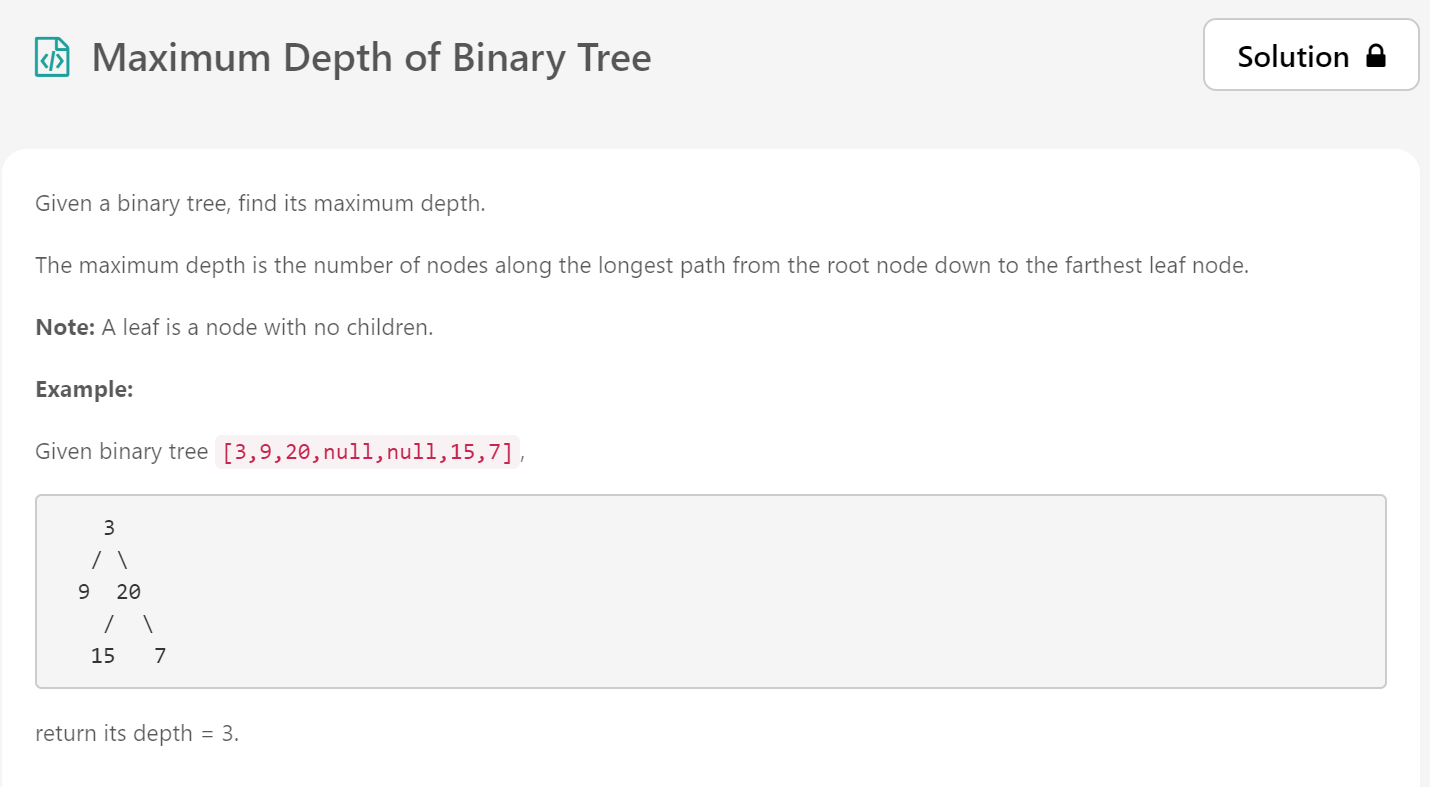

In [ ]:
'''Maximum Depth of Binary Tree

Given a binary tree, find its maximum depth.
The maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.
Note: A leaf is a node with no children.

Example:
Given binary tree [3,9,20,null,null,15,7],

    3
   / \
  9  20
    /  \
   15   7
return its depth = 3. '''

# My solution , quite slow 44ms
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxDepth(self, root: TreeNode) -> int:
        
        def helper(node: TreeNode, depth: int):
            if not node:
                return depth
            l,r = depth,depth
            
            if node.left: l = helper(node.left, depth +1)
            if node.right: r = helper(node.right,depth +1)
                
            return l if l > r else r
        
        return helper(root,1) if root else 0


# faster solution
# recursive function from the beginning 
class Solution:
    def maxDepth(self, root: TreeNode) -> int:
        
        # edge cases
        if root is None:
            return 0
        elif root.left is None and root.right is None:
            return 1
        else:
            return 1 + max(self.maxDepth(root.left), self.maxDepth(root.right))

# Or simpler 
class Solution:
    def maxDepth(self, root: TreeNode) -> int:
        if root == None: return 0 

        left = self.maxDepth(root.left)
        right = self.maxDepth(root.right)
        
        return max(left, right) + 1

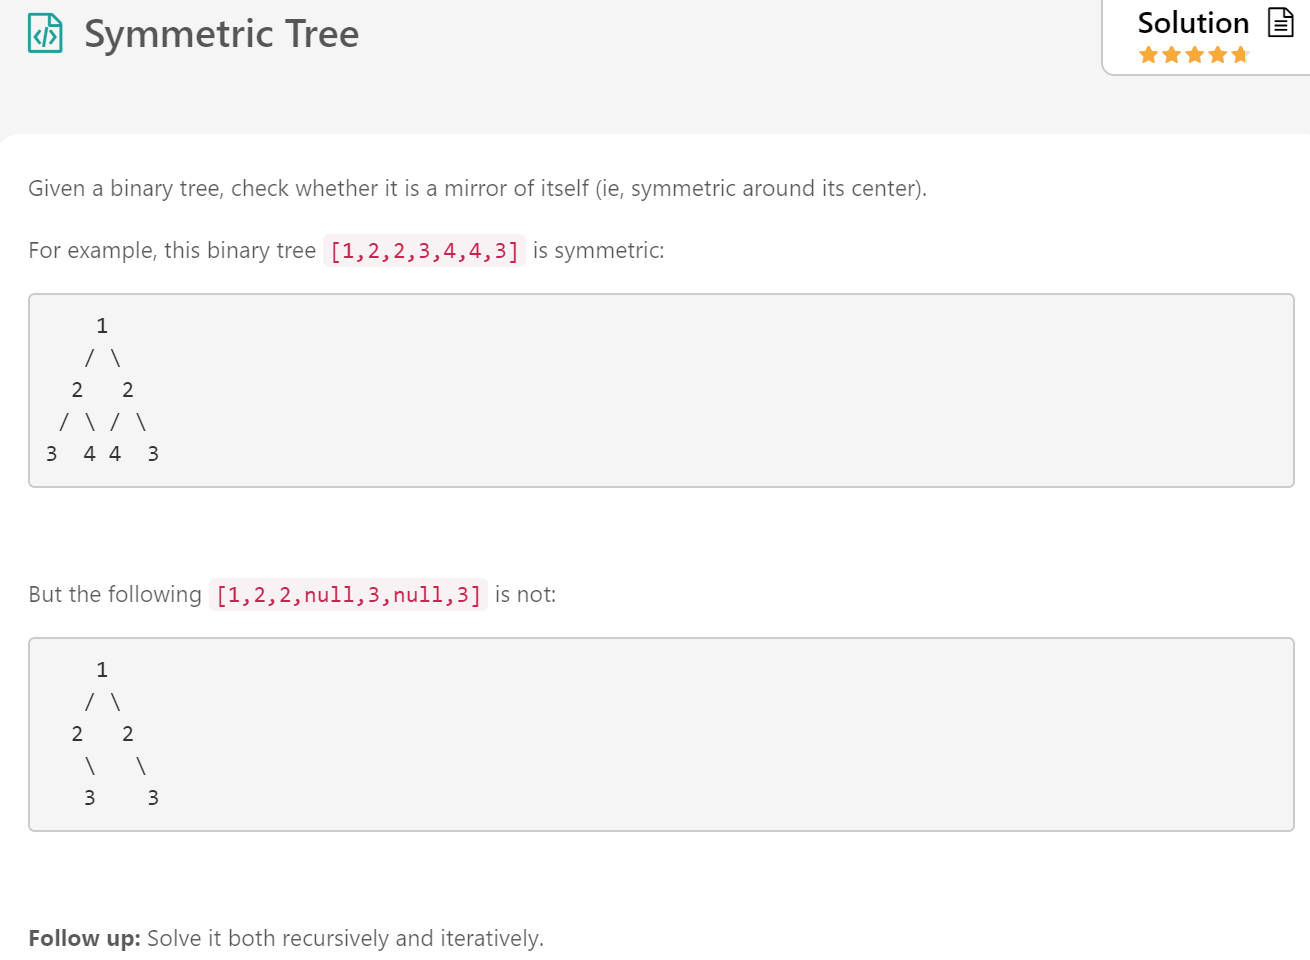

In [ ]:
'''  Symmetric Tree

Given a binary tree, check whether it is a mirror of itself (ie, symmetric around its center).

For example, this binary tree [1,2,2,3,4,4,3] is symmetric:
    1
   / \
  2   2
 / \ / \
3  4 4  3
 

But the following [1,2,2,null,3,null,3] is not:
    1
   / \
  2   2
   \   \
   3    3

Follow up: Solve it both recursively and iteratively.'''
# Approach 1, Recursive

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isSymmetric(self, root: TreeNode) -> bool:
        
        def helper(t1 :TreeNode, t2 :TreeNode):
            if (not t1) and (not t2):
                return True
            if (not t1) or (not t2):
                return False
            return (t1.val == t2.val) and helper(t1.right,t2.left) and helper(t1.left, t2.right)
        
        return helper(root,root)


# Approach 2, Iterate

class Solution:
    def isSymmetric(self, root: TreeNode) -> bool:
        queue = []
        queue.append(root)
        queue.append(root)
        
        while queue:
            t1 = queue.pop()
            t2 = queue.pop()
            
            if not t1 and not t2: continue
            if not t1 or not t2: return False
            if t1.val != t2.val: return False
            queue.append(t1.left)
            queue.append(t2.right)
            queue.append(t1.right)
            queue.append(t2.left)
            
        return True

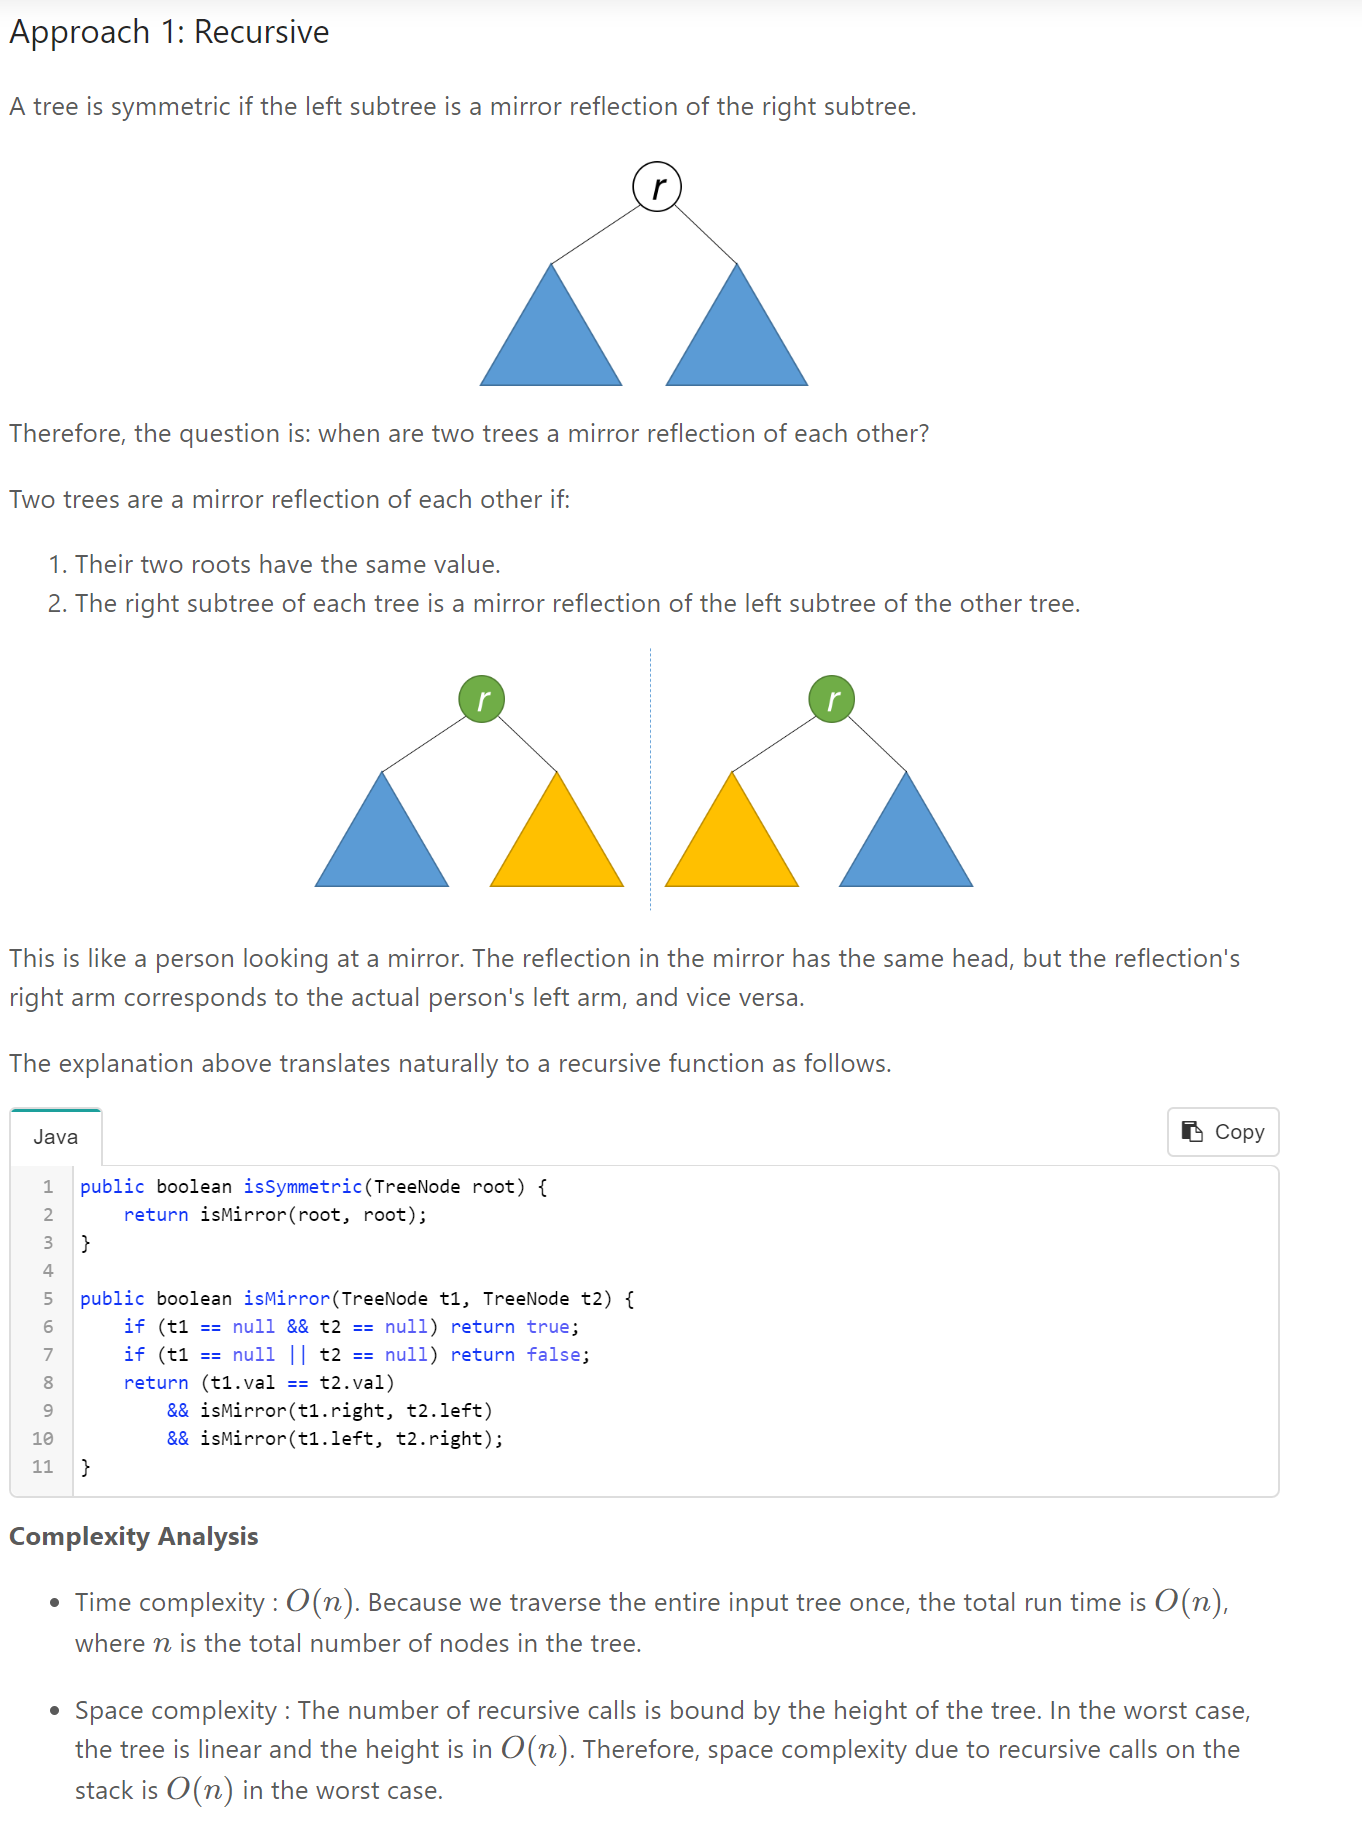

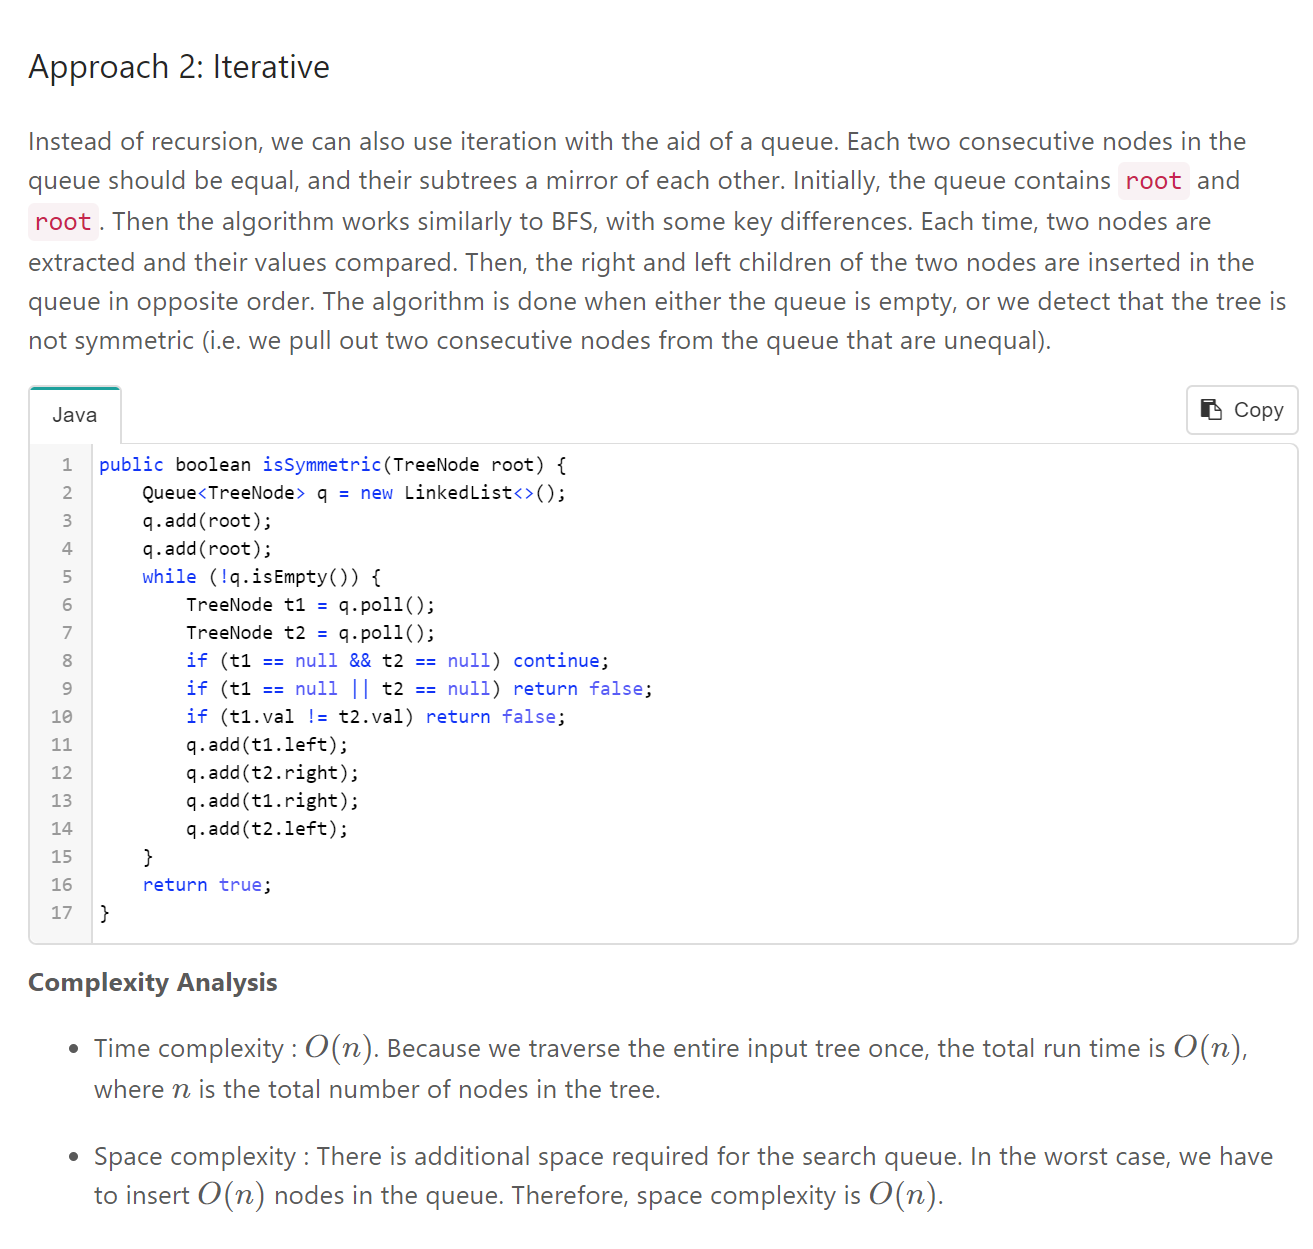

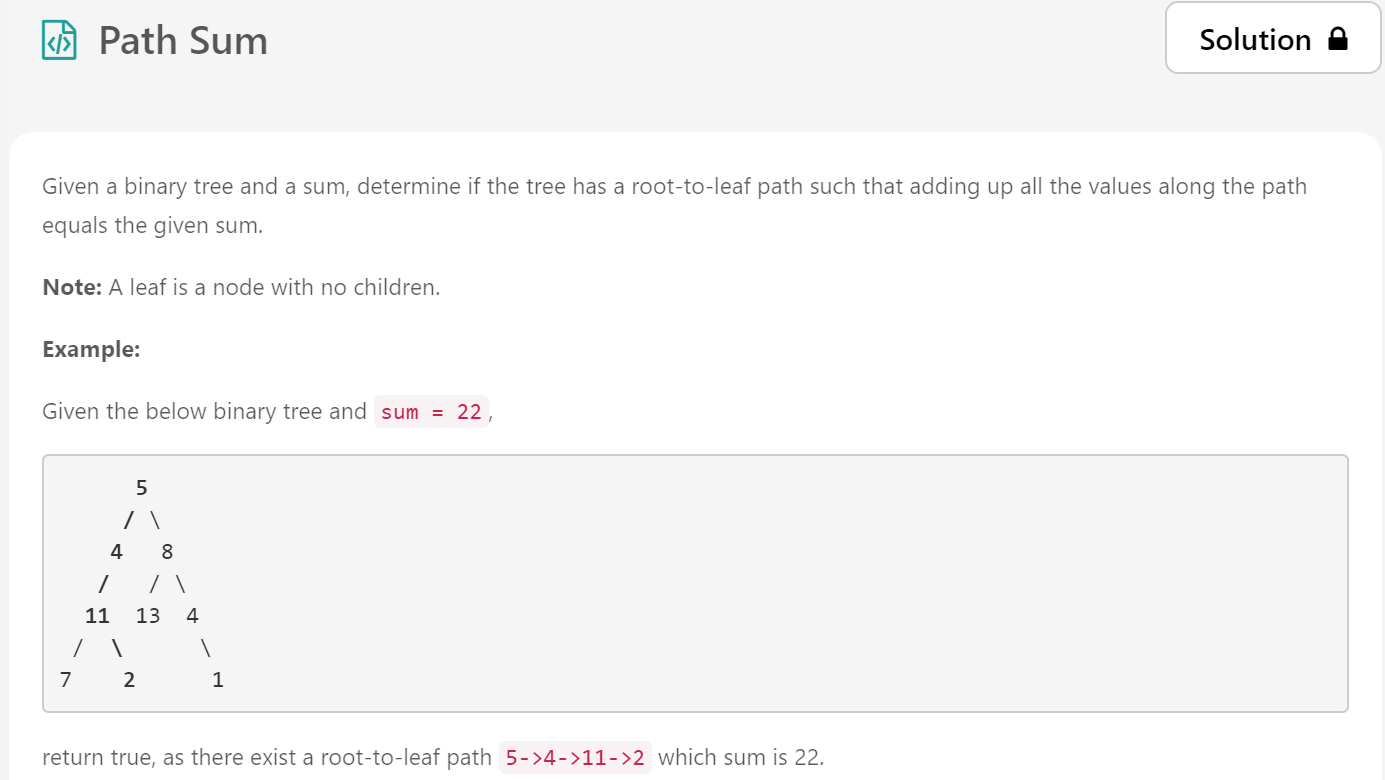

In [ ]:
'''Path Sum

Given a binary tree and a sum, determine if the tree has a root-to-leaf path such that 
adding up all the values along the path equals the given sum.

Note: A leaf is a node with no children.

Example:
Given the below binary tree and sum = 22,

      5
     / \
    4   8
   /   / \
  11  13  4
 /  \      \
7    2      1
return true, as there exist a root-to-leaf path 5->4->11->2 which sum is 22.'''


### recursive helper function quite slow 60 ms
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

class Solution:
    def hasPathSum(self, root: TreeNode, sum: int) -> bool:       
        def helper(node: TreeNode, lastsum: int, target: int)->bool:
            if not node:
                return False
                
            lastsum += node.val
            
            if not node.left and not node.right and lastsum == target:
                return True
            elif not node.left and not node.right and lastsum != target:
                return False
          
            return helper(node.left,lastsum,target) or helper(node.right,lastsum,target)        
        return helper(root,0,sum) if root else False
        

# Fastest solution using stack
# 24ms 

class Solution:
    def hasPathSum(self, root: TreeNode, sum: int) -> bool:
        if not root:
            return False
        stack = [root]
        while stack:
            current = stack.pop()
            if current.val == sum and not current.left and not current.right:
                return True
            
            if current.left:
                current.left.val += current.val
                stack.append(current.left)
                
            if current.right:
                current.right.val += current.val
                stack.append(current.right)
                
        return False


# 2 other possible approaches

# 1 double pre/DFS/recursion, O(n), O(n), 36ms, 96.57% (((GREAT)))
#check if the requirements are meet once we reach a leaf

class Solution:
    def hasPathSum(self, root: TreeNode, sum: int) -> bool:
        if not root:
            return False
        #if reach a leaf
        sum -= root.val
        if not root.left and not root.right:
            return sum == 0
        return self.hasPathSum(root.left, sum) or self.hasPathSum(root.right, sum)

    
# 2 iteration
class Solution:
    def hasPathSum(self, root: TreeNode, sum: int) -> bool:
        if not root:
            return False
        stack = [(root, sum)]
        while stack:
            curr, total = stack.pop()
            total -= curr.val
            if not curr.left and not curr.right:
                if total == 0:
                    return True
            if curr.left:
                stack.append((curr.left, total))
            if curr.right:
                stack.append((curr.right, total))
        return False




#### DFS, 36 ms

class Solution:
    def hasPathSum(self, root: TreeNode, sum: int) -> bool:
        res = []
        self.dfs(root,sum,res)
        return any(res)
    
    def dfs(self,root,target,res):
        if root:
            if not root.left and not root.right:
                if root.val == target:
                    res.append(True)
                    
            if root.left:
                self.dfs(root.left, target-root.val,res)
            if root.right:
                self.dfs(root.right, target-root.val,res)